## Observations and Insights 

Based on the data below, the following are the observations and insights:

A. The mean tumor volume for Capomulin is lower than the other drugs being compared in the study, with the exception of Ramicane. This could indicate that Capomulin is more effective at reducing tumor size compared to the other drugs.

B. The line plot of one of the mice on the Capomulin study supports the observation above, indicating that tumor volume was reduced by over 50% during the course of the study.

C. Based on the scatter plot, correlation, and regression, there is a high correlation between the average tumor volume and mouse weight (correlation = 0.84 and r-squared = 0.71). With this strong positive correlation you could assume that the greater the mouse weight, the larger the tumor. This data should be compared with the mice in the other drug regimen studies to determine if the lower tumor volume (see A) could be attributed to lower mouse weight, rather than the increased effectiveness of the Capomulin drug.

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_complete = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
study_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [26]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_complete["Mouse ID"].value_counts()

g989    13
c832    10
a963    10
k894    10
y769    10
        ..
v199     1
f932     1
o848     1
d133     1
h428     1
Name: Mouse ID, Length: 249, dtype: int64

In [27]:
#Identify duplicated mouse ID
study_complete.loc[study_complete.duplicated(), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [28]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows = study_complete[study_complete.duplicated(["Mouse ID", "Timepoint"])]
duplicate_rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_df = pd.DataFrame(study_complete)

clean_study_df.drop(clean_study_df[clean_study_df['Mouse ID']=='g989'].index, inplace=True)

clean_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [30]:
# Checking the number of mice in the clean DataFrame.
clean_study_df["Mouse ID"].value_counts()

c832    10
p438    10
l725    10
k894    10
y769    10
        ..
n482     1
v199     1
f932     1
d133     1
h428     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_df = pd.DataFrame(clean_study_df)
drug_stats_df = drug_df.groupby(["Drug Regimen"])

tumor_mean = drug_stats_df["Tumor Volume (mm3)"].mean()
tumor_median = drug_stats_df["Tumor Volume (mm3)"].median()
tumor_variance = drug_stats_df["Tumor Volume (mm3)"].var()
tumor_std = drug_stats_df["Tumor Volume (mm3)"].std()
tumor_sem = drug_stats_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

summary_df = pd.DataFrame({"Tumor Mean": tumor_mean, "Tumor Median": tumor_median, "Tumor Variance": tumor_variance, "Tumor STD": tumor_std,
                          "Tumor SEM": tumor_sem})

summary_df

,Tumor Mean,Tumor Median,Tumor Variance,Tumor STD,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method,produce the same summary statistics in a single line
drug_stats2 = drug_stats_df.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

drug_stats2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

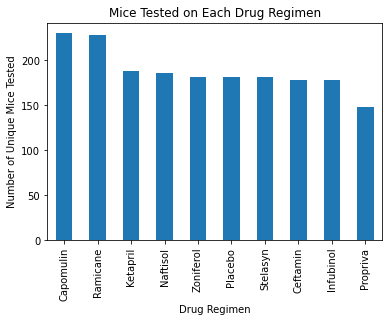

In [33]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# Split up our data into groups based upon 'drug regimen'

counts = clean_study_df['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Unique Mice Tested")
plt.title("Mice Tested on Each Drug Regimen")
plt.show()

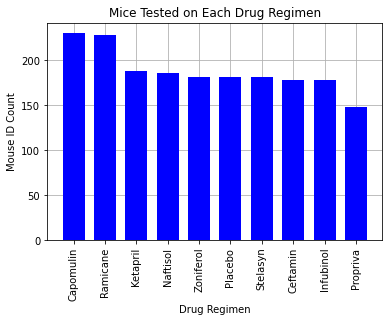

In [34]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# Set x axis and tick locations

#set the x_axis to the length of the count series
x_axis = np.arange(len(counts))

#Generate bar plot length of the mouse ID count series.
plt.bar(x_axis, counts, width = 0.7, color='b', zorder=3)

#Label and tick marks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)

#Rotate tick marks 90 degrees for visibility
plt.xticks(rotation=90)

#set labels for axis
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse ID Count")
plt.title("Mice Tested on Each Drug Regimen")

plt.grid(zorder=0)

plt.show()

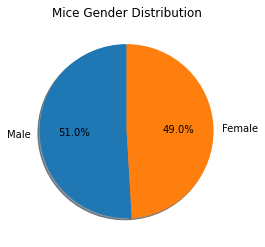

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_study_df['Sex'].value_counts()

gender_pie = gender.plot(kind="pie", y='Sex',autopct="%1.1f%%", shadow=True, startangle = 90, title=("Mice Gender Distribution"))


gender_pie.set_ylabel('')

plt.show()

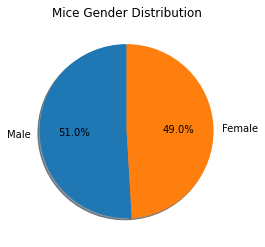

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = clean_study_df['Sex'].value_counts()

plt.pie(gender, labels=gender.index.values, autopct="%1.1f%%", shadow=True, startangle=90,)
plt.title("Mice Gender Distribution")

plt.show()

## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumor_df = pd.DataFrame(clean_study_df)

# final_tumor_df = pd.DataFrame(tumor_df.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index().rename(columns=
#                 {'Timepoint': 'max_timepoint'})
#final_tumor_df = pd.DataFrame(tumor_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

final_tumor = tumor_df.groupby('Mouse ID').max()['Timepoint']
final_tumor_df = pd.DataFrame(final_tumor)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#tumor_stats_df = pd.merge(tumor_df, final_tumor_df, on='Mouse ID')

tumor_stats_df = pd.merge(final_tumor_df, tumor_df, on=('Mouse ID', 'Timepoint'))

tumor_stats_df                           

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [38]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []


# Loop through treatment list to create data.
for drug in drugs:
        treatment_df = tumor_stats_df.loc[tumor_stats_df['Drug Regimen'] == drug]

        volume = treatment_df['Tumor Volume (mm3)']
        tumor_volume.append(volume)

    
        # Calculate the IQR and quantitatively determine if there are any potential outliers. 
        quartiles = volume.quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq

        print(f'IQR for {drug}: {iqr}')

        lower_bound = lowerq - (1.5*iqr)    
        upper_bound = upperq + (1.5*iqr)

        print(f"Lower bound for {drug}: {lower_bound}.")
        print(f"Upper bound for {drug}: {upper_bound}.") 

        outliers = (volume.loc[(tumor_stats_df['Tumor Volume (mm3)'] >= upper_bound) | (tumor_stats_df['Tumor Volume (mm3)'] <= lower_bound)]).count()

        print(f"Numbre of {drug} outliers: {outliers}\n")    

     

IQR for Capomulin: 7.781863460000004
Lower bound for Capomulin: 20.70456164999999.
Upper bound for Capomulin: 51.83201549.
Numbre of Capomulin outliers: 0

IQR for Ramicane: 9.098536719999998
Lower bound for Ramicane: 17.912664470000003.
Upper bound for Ramicane: 54.30681135.
Numbre of Ramicane outliers: 0

IQR for Infubinol: 11.477135160000003
Lower bound for Infubinol: 36.83290494999999.
Upper bound for Infubinol: 82.74144559000001.
Numbre of Infubinol outliers: 1

IQR for Ceftamin: 15.577752179999997
Lower bound for Ceftamin: 25.355449580000002.
Upper bound for Ceftamin: 87.66645829999999.
Numbre of Ceftamin outliers: 0



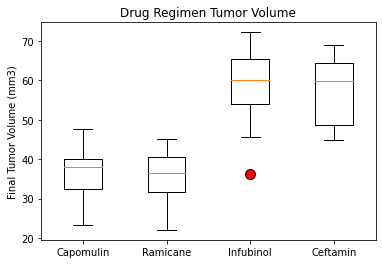

In [39]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


flierprops = dict(marker = 'o', markerfacecolor= 'r', markersize=10, markeredgecolor='black')

plt.title('Drug Regimen Tumor Volume')
plt.ylabel('Final Tumor Volume (mm3)')

plt.boxplot(tumor_volume, flierprops=flierprops, labels=drugs)
plt.show()

In [40]:
capomulin_df = clean_study_df.loc[clean_study_df['Drug Regimen'] == 'Capomulin']
    
capomulin_df  

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


## Line and Scatter Plots

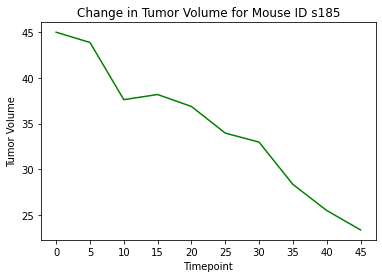

In [41]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = capomulin_df.loc[capomulin_df['Mouse ID'] == 's185']
tumor_volume = mouse['Tumor Volume (mm3)']
time = mouse['Timepoint']

# # Plot our line that the change in tumor over time
plt.plot(time, tumor_volume, color="green", label="Change in Tumor Volume")

plt.title("Change in Tumor Volume for Mouse ID s185")
plt.xlabel("Timepoint")
plt.xticks(np.arange(min(time), max(time)+5, 5.0))
plt.ylabel("Tumor Volume")

# Print chart to the screen
plt.show()


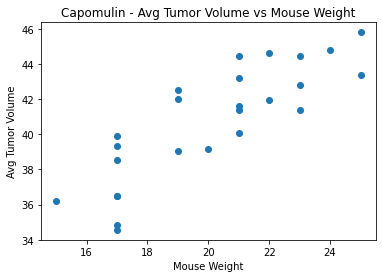

In [42]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_plot = capomulin_df.groupby(['Mouse ID'])
# Create series for average tumor volume and mouse weight for each mouse
avg_tumor = scatter_plot["Tumor Volume (mm3)"].mean()
mouse_weight = scatter_plot["Weight (g)"].mean()

#Generate scatter plot
plt.scatter(mouse_weight,avg_tumor)
plt.xlabel('Mouse Weight')
plt.ylabel('Avg Tumor Volume')
plt.title('Capomulin - Avg Tumor Volume vs Mouse Weight')

plt.show()


## Correlation and Regression

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708717


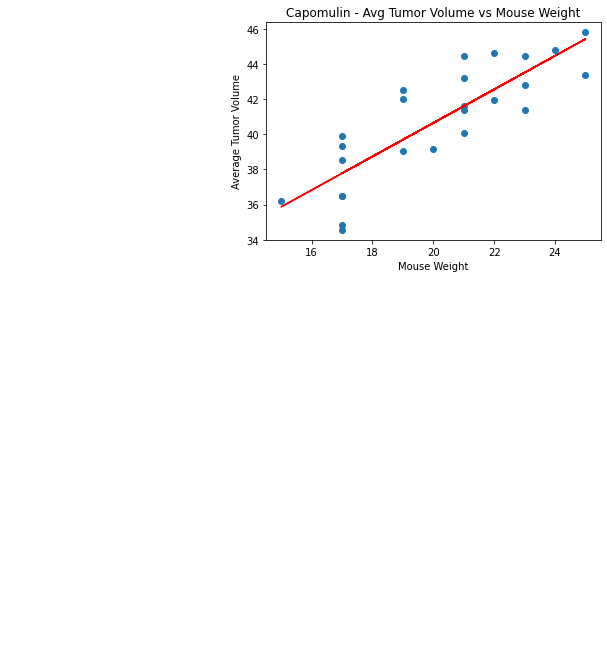

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Calculate the correlation coefficient
correlation = st.pearsonr(mouse_weight,avg_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Add the linear regression equation and line to plot
x_values = mouse_weight
y_values = avg_tumor
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.title('Capomulin - Avg Tumor Volume vs Mouse Weight')
print(f"The r-squared is: {rvalue**2}")
plt.show()
